# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2020
## Домашнее задание 4. Доверительные интервалы
### Дедлайн --- 29 ноября 9:00

Мы предлагаем выполнять задания прямо в этом ноутбуке. **Пожалуйста, не стирайте условия задач и не переименовывайте ноутбук!**

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается **в 10 баллов**.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps

from tqdm.notebook import tqdm
from typing import Callable

sns.set(font_scale=1.4, style='whitegrid', palette='Set2')

import warnings
warnings.filterwarnings('ignore')

## Задача 1

Сгенерируйте выборку $X_1, ...,X_{100}$ из распределения $P_\theta$.

Для уровня доверия $\alpha = 0.95$ для всех $n \leq 100$
изобразите на графиках в координатах $(n, \theta)$
* Доверительный интервал оценки $\widehat{\theta}$
* График оценки $\widehat{\theta}$
* Точки выборки

Для отрисовки доверительного интервала используйте `plt.fill_between`. Не забывайте про параметр `alpha`.

Для того, чтобы избежать дублирования кода, рекомендуем написать функцию `draw_confidence_interval`, изображающую на графике все необходимое.

In [ ]:
theta = 10
n = 100
alpha = 0.95

def draw_confidence_interval(x, y1, y2):
  plt.fill_between(x, y1, y2, alpha=0.2)

Выполните задание для следующих $P_\theta$ и $\widehat{\theta}$ (формулы доверительных итервалов были получены на семинарах):

### 1. Равномерное распределение, $\theta = 10$, оценка $\widehat{\theta} = X_{(n)}$

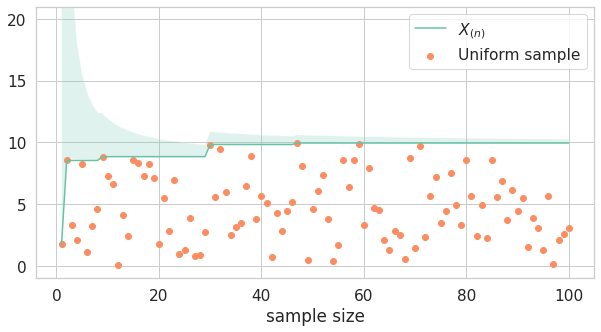

In [ ]:
uniform_sample = sps.uniform.rvs(scale=theta, size=n)
uniform_theta_estimator = np.array(pd.Series(uniform_sample[:n]).cummax())
x = np.linspace(1, n, n)

plt.figure(figsize=(10, 5))
plt.plot(x, uniform_theta_estimator, label=r'$X_{(n)}$')
draw_confidence_interval(
    x,
    uniform_theta_estimator / alpha ** (1 / (np.arange(n) + 1)),
    uniform_theta_estimator / (1 - alpha) ** (1 / (np.arange(n) + 1)),
)
plt.scatter(x, uniform_sample, label='Uniform sample')
plt.xlabel('sample size')
plt.legend()
plt.ylim(-1, 21)
plt.show()

### 2. Распределение Коши, $\theta = 10$, оценка — медиана

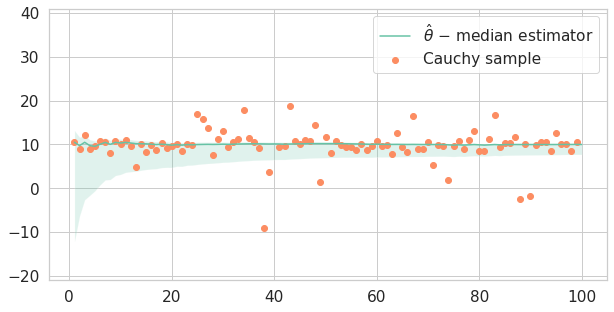

In [ ]:
import statistics

cauchy_sample = sps.cauchy.rvs(loc=theta, size=n)
cauchy_theta_estimator = np.array([statistics.median(cauchy_sample[:i + 1]) for i in range(n)])
x = np.linspace(1, n, n)

plt.figure(figsize=(10, 5))
plt.plot(x, cauchy_theta_estimator, label=r'$\hat{\theta}$ $-$ median estimator')
draw_confidence_interval(
    x,
    cauchy_theta_estimator - sps.cauchy.ppf((1+alpha)/2, loc=theta) / np.sqrt(np.arange(n) + 1),
    cauchy_theta_estimator - sps.cauchy.ppf((1-alpha)/2, loc=theta) / np.sqrt(np.arange(n) + 1)
)
plt.scatter(x, cauchy_sample, label='Cauchy sample')
plt.legend()
plt.ylim(-21, 41)
plt.show()

### 3. Распределение Пуассона, $\theta = 10$, оценка $\widehat{\theta} = \overline{X}$

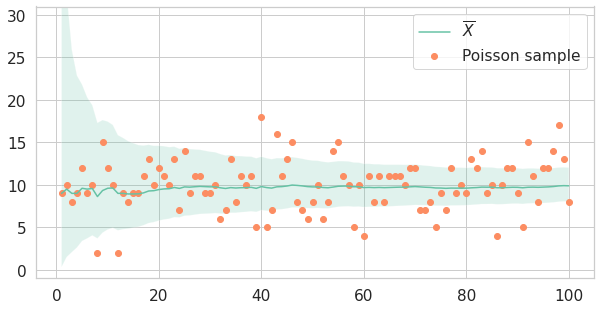

In [ ]:
poisson_sample = sps.poisson.rvs(theta, size=n)
poisson_theta_estimator = np.cumsum(poisson_sample) / (np.arange(n) + 1)
x = np.linspace(1, n, n)

plt.figure(figsize=(10, 5))
plt.plot(x, poisson_theta_estimator, label=r'$\overline{X}$')
summand = 1 / (2 * (1 - alpha) * (np.arange(n) + 1))
draw_confidence_interval(
    x,
    (np.sqrt(poisson_theta_estimator + summand / 2) - np.sqrt(summand))**2,
    (np.sqrt(poisson_theta_estimator + summand / 2) + np.sqrt(summand))**2,
)
plt.scatter(x, poisson_sample, label='Poisson sample')
plt.legend()
plt.ylim(-1, 31)
plt.show()

### 4. Гамма-распределение, $(\theta, \lambda) = (10, 3)$, $\lambda$ известна

По методу максимального правдоподобия находим $\hat\theta=\frac{\overline X}{k}$. Имеем $\overline X \sim \Gamma(\theta, k)$, следовательно статистика $G(X, \theta)=\frac{\overline X}{\theta}\sim\Gamma(1, k)$ не зависит от $\theta$. Отсюда находим
$$\frac{\overline X}{T_1(X)}=G(X, T_1(X))=z_{\frac{1+\alpha}{2}},\quad \frac{\overline X}{T_2(X)}=G(X, T_2(X))=z_{\frac{1-\alpha}{2}},$$
$$(T_1(X), T_2(X))=\left(\overline X / z_{\frac{1+\alpha}{2}}, \overline X / z_{\frac{1-\alpha}{2}}\right),$$
где $z_\gamma$ $-$  $\gamma$-квантиль распределения $\Gamma(1, k)$.

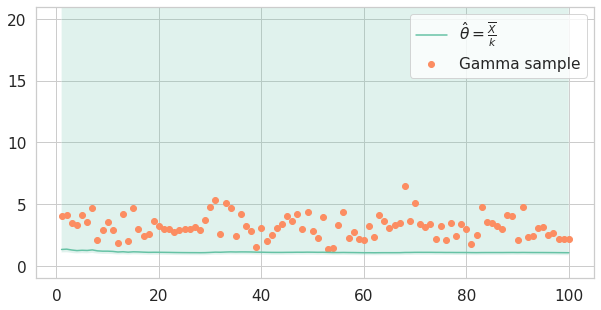

In [ ]:
k = 3
gamma_sample = sps.gamma.rvs(a=theta, scale=1/k, size=n)
gamma_theta_estimator = np.cumsum(gamma_sample) / (np.arange(n) + 1) / k
x = np.linspace(1, n, n)

plt.figure(figsize=(10, 5))
plt.plot(x, gamma_theta_estimator, label=r'$\hat\theta=\frac{\overline{X}}{k}$')
draw_confidence_interval(
    x,
    gamma_theta_estimator / sps.gamma.ppf((1 + alpha) / 2, 1, scale=1/k),
    gamma_theta_estimator / sps.gamma.ppf((1 - alpha) / 2, 1, scale=1/k)
)
plt.scatter(x, gamma_sample, label='Gamma sample')
plt.legend()
plt.ylim(-1, 21)
plt.show()

Сделайте выводы о размерах и форме доверительных интервалов для каждого случая.

# Задача 2

Для $n = 100$ оцените для кажого пункта предыдущей задачи вероятность попадания истинного значения
$\theta$ в интервал. Для этого нужно сделать слудующее:
1. Сгенерируйте достаточно много выборок из $P_{\theta}$
2. Постройте по каждой из них интервалы для $\widehat{\theta}$
3. Определите, сколько раз истинное значение $\theta.$ попадает в построенные интервалы. Таким способом будет
построена бернуллиевская выборка, по ней оцените вероятность.

Предположите, какое количество выборок нужно взять. Обоснуйте свой выбор.

__Ответ:__

In [ ]:
sample_count = 100

### Равномерное распределение

In [ ]:
theta_is_in_uniform_CI = np.zeros(sample_count)

for i in range(sample_count):
  uniform_sample = sps.uniform.rvs(scale=theta, size=n)
  uniform_theta_estimator = np.max(uniform_sample)
  lower_bound = uniform_theta_estimator / alpha ** (1 / n)
  upper_bound = uniform_theta_estimator / (1 - alpha) ** (1 / n)
  theta_is_in_uniform_CI[i] = (lower_bound <= theta and theta <= upper_bound)

print('P(theta is in confidence interval) =', theta_is_in_uniform_CI.mean())

P(theta is in confidence interval) = 0.94


### Распределение Коши

In [ ]:
theta_is_in_cauchy_CI = np.zeros(sample_count)

for i in range(sample_count):
  cauchy_sample = sps.cauchy.rvs(loc=theta, size=n)
  cauchy_theta_estimator = statistics.median(cauchy_sample)
  lower_bound = cauchy_theta_estimator - sps.cauchy.ppf((1+alpha)/2, loc=theta) / np.sqrt(n)
  upper_bound = cauchy_theta_estimator - sps.cauchy.ppf((1-alpha)/2, loc=theta) / np.sqrt(n)
  theta_is_in_cauchy_CI[i] = (lower_bound <= theta and theta <= upper_bound)

print('P(theta is in confidence interval) =', theta_is_in_cauchy_CI.mean())

P(theta is in confidence interval) = 0.97


### Распределение Пуассона

In [ ]:
theta_is_in_poisson_CI = np.zeros(sample_count)

for i in range(sample_count):
  poisson_sample = sps.poisson.rvs(theta, size=n)
  poisson_theta_estimator = poisson_sample.mean()
  summand = 1 / (2 * (1 - alpha) * n)
  lower_bound = (np.sqrt(poisson_theta_estimator + summand / 2) - np.sqrt(summand))**2
  upper_bound = (np.sqrt(poisson_theta_estimator + summand / 2) + np.sqrt(summand))**2
  theta_is_in_poisson_CI[i] = (lower_bound <= theta and theta <= upper_bound)

print('P(theta is in confidence interval) =', theta_is_in_poisson_CI.mean())

P(theta is in confidence interval) = 1.0


### Гамма-распределение

In [ ]:
theta_is_in_gamma_CI = np.zeros(sample_count)

for i in range(sample_count):
  gamma_sample = sps.gamma.rvs(a=theta, scale=1/k, size=n)
  gamma_theta_estimator = np.sum(gamma_sample) / (n*k)
  lower_bound = gamma_theta_estimator / sps.gamma.ppf((1 + alpha) / 2, 1, scale=1/k)
  upper_bound = gamma_theta_estimator / sps.gamma.ppf((1 - alpha) / 2, 1, scale=1/k)
  theta_is_in_gamma_CI[i] = (lower_bound <= theta and theta <= upper_bound)

print('P(theta is in confidence interval) =', theta_is_in_gamma_CI.mean())

P(theta is in confidence interval) = 1.0


Сделайте выводы.

# Задача 3

В этой задаче мы построим точный и асимптотический доверительный интевалы для нормального распределения и сравним их.

Пусть $X_1, \dots, X_n$ — выборка из нормального распределения со средним $a$ и дисперсией $\sigma^2$, причем $\sigma$ неизвестна. Выпишите формулы

* точного доверительного итервала уровня доверия $\alpha$ для $a$:

* асимптотического доверительного итервала уровня доверия $\alpha$ для $a$


Точный доверительный интервал есть $\left(\overline X-\frac{s}{\sqrt n}t_{n-1, 1-\frac{\alpha}{2}},\ \ \overline X+\frac{s}{\sqrt n}t_{n-1, 1-\frac{\alpha}{2}}\right)$, где $t_{k, p}$ $-$ $p$-квантиль распределения Стьюдента.
Асимптотический доверительный интервал есть $\left(\overline X-\frac{s}{\sqrt n}|z_{\frac{\alpha}{2}}|,\ \ \overline X+\frac{s}{\sqrt n}|z_{\frac{\alpha}{2}}|\right)$, где $z_p$ $-$ $p$-квантиль стандартного нормального распределения.

Для $n=30, \,a = 0$ постройте __на одном графике__ точный и асимптотический доверительный интервал, а также отметьте линией истинное значение $a$

In [ ]:
n = 30
a = 0

In [ ]:
def calculate_conf_interval(
    sample: np.ndarray, 
    alpha: float = 0.95
):
    """Вычисление точного доверительного интервала уровня доверия alpha. """
    sample_mean = np.cumsum(sample) / (np.arange(n) + 1)
    sample_scale = np.sqrt(np.cumsum(sample**2) / (np.arange(n) + 1) - sample_mean**2)
    lower_bound = np.array([sample_mean[i] - sample_scale[i] / np.sqrt(i + 1) * sps.t.ppf(1-alpha/2, df=i) for i in range(n)])
    upper_bound = np.array([sample_mean[i] + sample_scale[i] / np.sqrt(i + 1) * sps.t.ppf(1-alpha/2, df=i) for i in range(n)])
    return lower_bound, upper_bound

In [ ]:
def calculate_asymptotic_conf_interval(
    sample: np.ndarray, 
    alpha: float = 0.95
):
    """Вычисление асимптотического доверительного интервала уровня доверия alpha. """
    sample_mean = np.cumsum(sample) / (np.arange(n) + 1)
    sample_scale = np.sqrt(np.cumsum(sample**2) / (np.arange(n) + 1) - sample_mean**2)
    lower_bound = sample_mean - sample_scale / np.sqrt(np.arange(n) + 1) * np.abs(sps.norm.ppf(alpha/2))
    upper_bound = sample_mean + sample_scale / np.sqrt(np.arange(n) + 1) * np.abs(sps.norm.ppf(alpha/2))
    return lower_bound, upper_bound

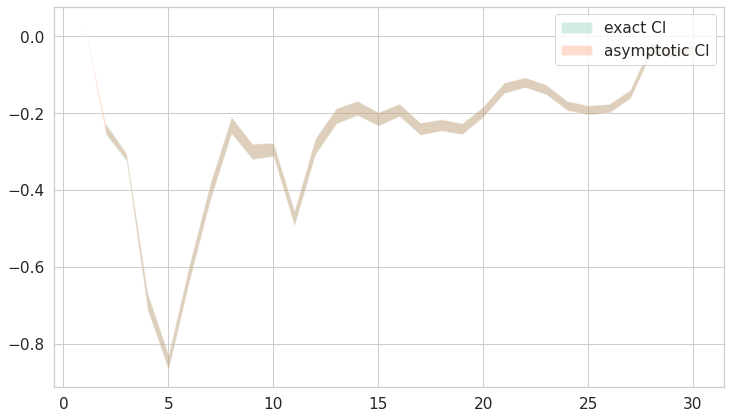

In [ ]:
normal_sample = sps.norm.rvs(size=n)

plt.figure(figsize=(12, 7))

lower_bound, upper_bound = calculate_conf_interval(normal_sample, alpha)
lower_asymptotic_bound, upper_asymptotic_bound = calculate_asymptotic_conf_interval(normal_sample, alpha)

x = np.linspace(1, n, n)
plt.fill_between(x, lower_bound, upper_bound, alpha=0.3, label='exact CI')
plt.fill_between(x, lower_asymptotic_bound, upper_asymptotic_bound, alpha=0.3, label='asymptotic CI')
plt.legend(loc='best')
plt.show()

Сделайте выводы. В каких случаях уместно использовать асимптотический интервал вместо точного?

# Задача 4

В этой задаче мы проанализируем изменение индекса качества воздуха (air quality index, AQI) для двух мегаполисов Индии за последние годы. Данные взяты с Kaggle (https://www.kaggle.com/rohanrao/air-quality-data-in-india)

In [ ]:
!gdown https://drive.google.com/uc?id=1Y_mE_jlEF82UDf41l1LFMDHX_LHvF2SC 

Downloading...
From: https://drive.google.com/uc?id=1Y_mE_jlEF82UDf41l1LFMDHX_LHvF2SC
To: /content/city_day.csv
100% 2.57M/2.57M [00:00<00:00, 126MB/s]


Загрузите файл `city_day.csv`. Нам понадобятся столбцы `City`, `Date` и `AQI`. При этом учтите, что:
* В дальнейшем мы будем работать с датами, поэтому используйте аргумент `parse_dates` чтобы корректо их распарсить
* Данные содержат пропуски, которые нужно удалить

In [ ]:
city_day_df = pd.read_csv("city_day.csv", parse_dates=['Date'])[['City', 'Date', 'AQI']].dropna()
city_day_df.head()

,City,Date,AQI
28,Ahmedabad,2015-01-29,209.0
29,Ahmedabad,2015-01-30,328.0
30,Ahmedabad,2015-01-31,514.0
31,Ahmedabad,2015-02-01,782.0
32,Ahmedabad,2015-02-02,914.0


Для удобства сохраните в отдельные поля `Month` и `Year` соответственно год и месяц, когда производились замеры

In [ ]:
city_day_df['Month'] = pd.DatetimeIndex(city_day_df['Date']).month
city_day_df['Year'] = pd.DatetimeIndex(city_day_df['Date']).year
city_day_df.head()

,City,Date,AQI,Month,Year
28,Ahmedabad,2015-01-29,209.0,1,2015
29,Ahmedabad,2015-01-30,328.0,1,2015
30,Ahmedabad,2015-01-31,514.0,1,2015
31,Ahmedabad,2015-02-01,782.0,2,2015
32,Ahmedabad,2015-02-02,914.0,2,2015


Нас будут интересовать два города: Мумбаи (Mumbai) и Калькутта (Kolkata). Сохраните данные по этим двум городам для всех днней с 1 июля 2018 года включительно

In [ ]:
cut_df = city_day_df.query('(Year == 2018 and Month >= 7) or Year > 2018')
mumbai = cut_df[cut_df['City'] == 'Mumbai']
kolkata = cut_df[cut_df['City'] == 'Kolkata']
mumbai.tail(), kolkata.tail()

(         City       Date   AQI  Month  Year
 23859  Mumbai 2020-06-27  64.0      6  2020
 23860  Mumbai 2020-06-28  64.0      6  2020
 23861  Mumbai 2020-06-29  54.0      6  2020
 23862  Mumbai 2020-06-30  54.0      6  2020
 23863  Mumbai 2020-07-01  53.0      7  2020,
           City       Date   AQI  Month  Year
 19841  Kolkata 2020-06-27  37.0      6  2020
 19842  Kolkata 2020-06-28  43.0      6  2020
 19843  Kolkata 2020-06-29  48.0      6  2020
 19844  Kolkata 2020-06-30  47.0      6  2020
 19845  Kolkata 2020-07-01  45.0      7  2020)

В предыдущих задачах мы строили доверительные интервалы в предположении, что выборка взята из параметрического семейства распределений. Но что делать в случае, когда подобное предположение сделать нельзя? Оказывается, в этом случае можно строить доверительный интервал с помощью бутстрепа.

Пусть $X_1, \dots, X_n$ — выборка, для которой мы хотим оценить некоторую величину $\theta$. Построим $k$ бутстепных выборок, и получим по ним оценки $\theta^*_1, \dots, \theta^*_k$. Отсортируем их, чтобы получить вариационный ряд $\theta^*_{(1)}, \dots, \theta^*_{(k)}$. Тогда получим, что
$$
C^* = \left(\theta^*_{(\lfloor k (1 + \alpha) / 2 \rfloor)},
\theta^*_{(\lceil k (1 - \alpha) / 2 \rceil)} \right)
$$
будет (приблизительным) доверительным интервалом для $\theta$ уровня доверия $\alpha$.

Для каждого месяца с июля 2018 по июнь 2020 включтельно постройте бутстрепный доверительный интервал для __среднего значения AQI__. В этом вам помогут следующие вспомогательные функции:

In [ ]:
def get_dataset_by_month(
    df: pd.DataFrame, 
    year: int,
    month: int
):
    """ Сохранение в массив данные для указанного месяца и года."""
    ret_dataset = df[df['Month'] == month][df['Year'] == year][['AQI']].to_numpy()
    return np.reshape(ret_dataset, (ret_dataset.shape[0],))

In [ ]:
from random import randint

def get_bootstrap_samples(
    sample: np.ndarray,
    k: int = 1000
):
    """ Построение k бутстрепных выборок для указанной выборки. """
    bootstrap_samples = []
    n = len(sample)
    for i in range(k):
      bootstrap_sample = np.zeros(n)
      for j in range(n):
        bootstrap_sample[j] = sample[randint(0, n-1)]
      bootstrap_samples.append(bootstrap_sample)
    return bootstrap_samples

In [ ]:
def bootstrap_conf_interval(
    sample: np.ndarray,
    estimator: Callable = lambda x: np.mean(x, axis=-1),
    alpha: float = 0.95,
):
    """ Построение бутстрепных доверительных интервалов. """
    k = len(sample)
    estimators = np.zeros(k)
    for i in range(k):
      estimators[i] = estimator(sample[i])
    estimators.sort()
    return estimators[int(k*(1+alpha)/2)], estimators[int(k*(1-alpha)/2)]

In [ ]:
n = 36
lefts = np.zeros(n)
rights = np.zeros(n)

for month in range(7, 19):
  for year in range(2018, 2021):
    month = month % 12
    if month == 0:
      month = 12
    dataset = get_dataset_by_month(city_day_df, year, month)
    bootstrap_samples = get_bootstrap_samples(dataset)
    index = (month - 7) * 3 + year - 2018
    lefts[index], rights[index] = bootstrap_conf_interval(bootstrap_samples)

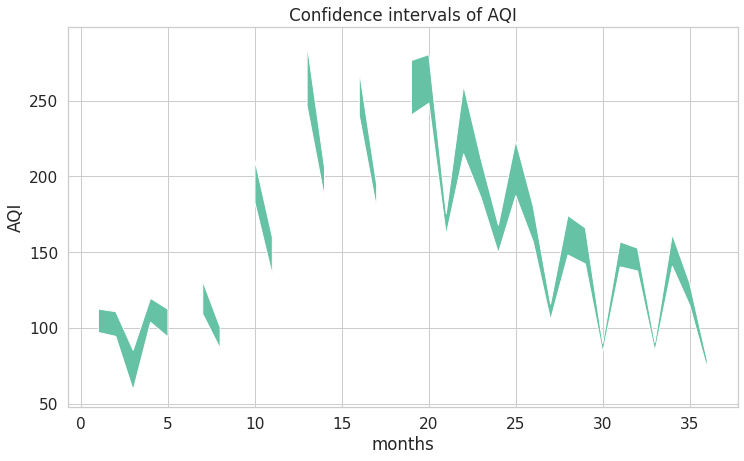

In [ ]:
n = 36
plt.figure(figsize=(12, 7))
x = np.linspace(1, n, n)
plt.fill_between(x, lefts, rights)
plt.title('Confidence intervals of AQI')
plt.xlabel('months')
plt.ylabel('AQI')
plt.show()

Постройте на одном графике доверительные интервалы для Мумбаи и Калькутты. Также отметьте точками на графике истинный средний AQI и соедините точки линиями. Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

In [ ]:
ym = mumbai[['Year', 'Month']].drop_duplicates().values[:-1]
labels = [f"{year}-{month}" for year, month in ym] # номера месяцев для подписей на графике 

mumbai_lefts = np.zeros(n)
mumbai_rights = np.zeros(n)
kolkata_lefts = np.zeros(n)
kolkata_rights = np.zeros(n)
kolkata_AQI_means = np.zeros(n)
mumbai_AQI_means = np.zeros(n)

for month in range(7, 19):
  for year in range(2018, 2021):
    month = month % 12
    if month == 0:
      month = 12
    mumbai_dataset = get_dataset_by_month(mumbai, year, month)
    kolkata_dataset = get_dataset_by_month(kolkata, year, month)
    mumbai_bootstrap_samples = get_bootstrap_samples(mumbai_dataset)
    kolkata_bootstrap_samples = get_bootstrap_samples(kolkata_dataset)
    index = (month - 7) * 3 + year - 2018
    kolkata_AQI_means[index] = np.array([kolkata_bootstrap_samples[i].mean() for i in range(len(kolkata_bootstrap_samples))]).mean()
    mumbai_AQI_means[index] = np.array([mumbai_bootstrap_samples[i].mean() for i in range(len(mumbai_bootstrap_samples))]).mean()
    mumbai_lefts[index], mumbai_rights[index] = bootstrap_conf_interval(mumbai_bootstrap_samples)
    kolkata_lefts[index], kolkata_rights[index] = bootstrap_conf_interval(kolkata_bootstrap_samples)

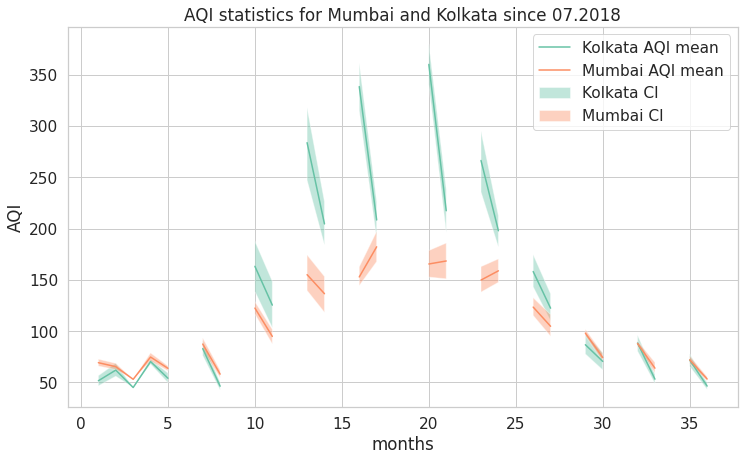

In [ ]:
import datetime

plt.figure(figsize=(12, 7))
plt.fill_between(x, kolkata_lefts, kolkata_rights, label='Kolkata CI', alpha=0.4)
plt.fill_between(x, mumbai_lefts, mumbai_rights, label='Mumbai CI', alpha=0.4)
plt.plot(x, kolkata_AQI_means, label='Kolkata AQI mean')
plt.plot(x, mumbai_AQI_means, label='Mumbai AQI mean')
plt.title('AQI statistics for Mumbai and Kolkata since 07.2018')
plt.xlabel('months')
plt.ylabel('AQI')
plt.legend()
plt.show()

Посмотрите на получившийся график. Видны ли в нем какие-либо закономерности? С чем они могут быть связаны?

Теперь давайте сравним качество воздуха в апреле 2019 и апреле 2020 годов. Постройте __на одном графике__
* доверительные интервалы для апреля 2019 и апреля 2020 для Мумбаи
* истинные средние значения (с помощью `plt.hlines`)
* точки выборки

Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

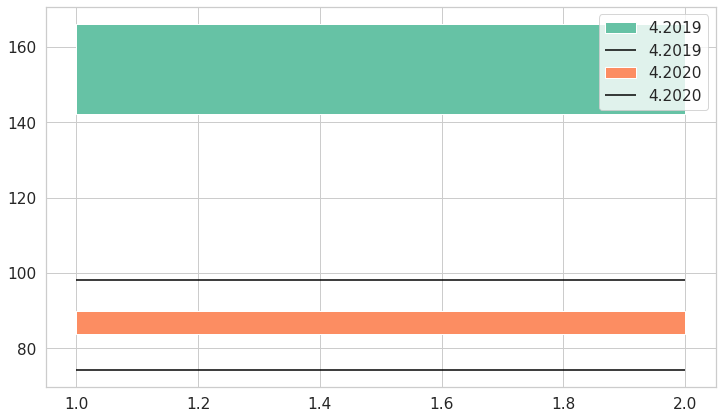

In [ ]:
plt.figure(figsize=(12, 7))
month = 4
for year in [2019, 2020]:
  mumbai_dataset = get_dataset_by_month(mumbai, year, month)
  mumbai_bootstrap_samples = get_bootstrap_samples(mumbai_dataset)
  index = (month - 7) * 3 + year - 2018
  plt.fill_between(np.linspace(1, 2, 2), [lefts[index]], [rights[index]], label=f'{month}.{year}')
  plt.hlines(mumbai_AQI_means[index], 1, 2, label=f'{month}.{year}')
plt.legend()
plt.show()

Теперь проделайте то же самое для Калькутты

In [ ]:
# YOUR CODE GOES HERE

Сделайте выводы. Что можно сказать про доверительные интервалы в каждом из случаев?